# Class Activation Maps

In [ ]:
import tensorflow as tf

from gcpds.image_segmentation.models import unet_baseline
from gcpds.image_segmentation.datasets.segmentation import OxfordIiitPet
from gcpds.image_segmentation.losses import DiceCoeficiente

In [ ]:
dataset = OxfordIiitPet()
train, *_ = dataset()

train = train.map(lambda img,mask,label,id_img: (img,mask), 
                                    num_parallel_calls=tf.data.AUTOTUNE)

shape = 256, 256
train = train.map(lambda img,mask: (tf.image.resize(img,shape), tf.image.resize(mask,shape)), 
                                    num_parallel_calls=tf.data.AUTOTUNE)

train = train.batch(32)

In [5]:
model = unet_baseline(input_shape=(256,256,3),out_channels=3)

model.compile(loss=DiceCoeficiente(), optimizer=tf.keras.optimizers.Adam())
model.fit(train, epochs=100)

Epoch 1/100
81/81 [==============================] - 35s 245ms/step - loss: -0.4946
Epoch 2/100
81/81 [==============================] - 19s 230ms/step - loss: -0.5851
Epoch 3/100
81/81 [==============================] - 19s 233ms/step - loss: -0.6406
Epoch 4/100
81/81 [==============================] - 19s 235ms/step - loss: -0.6810
Epoch 5/100
81/81 [==============================] - 19s 231ms/step - loss: -0.7145
Epoch 6/100
81/81 [==============================] - 19s 230ms/step - loss: -0.7347
Epoch 7/100
81/81 [==============================] - 19s 228ms/step - loss: -0.7506
Epoch 8/100
81/81 [==============================] - 19s 226ms/step - loss: -0.7613
Epoch 9/100
81/81 [==============================] - 18s 221ms/step - loss: -0.7724
Epoch 10/100
81/81 [==============================] - 18s 224ms/step - loss: -0.7828
Epoch 11/100
81/81 [==============================] - 19s 228ms/step - loss: -0.7886
Epoch 12/100
81/81 [==============================] - 27s 331ms/step - los

In [8]:
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np

from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

from gcpds.image_segmentation.class_activation_maps import SegScore

In [9]:
def plot_cams(cam,data,nrows=1, ncols=5,figsize=(20, 10)):
    f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.ravel()

    for i, title in enumerate(np.arange(nrows*ncols)):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[i].imshow(data[i])
        ax[i].imshow(heatmap, cmap='jet', alpha=0.3)
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()

In [10]:
images, masks  = train.unbatch().batch(5).take(1).get_single_element()

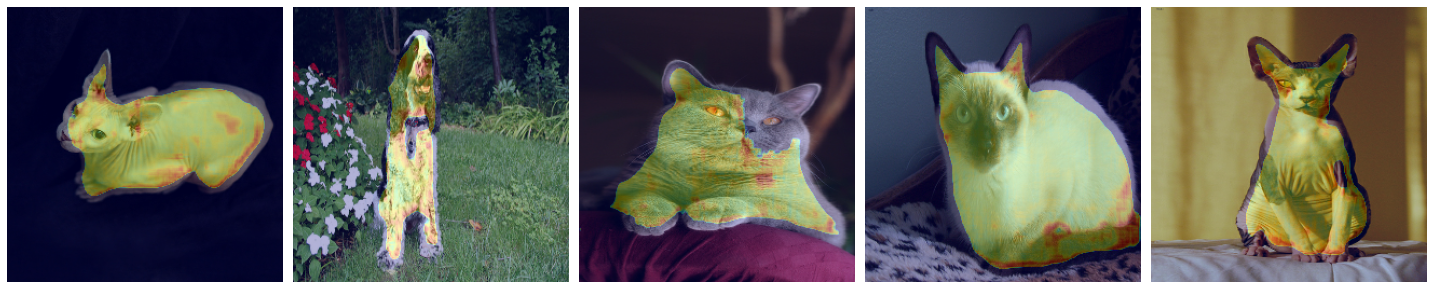

In [17]:
gradcam = Gradcam(model,
                   model_modifier=ReplaceToLinear(),
                  clone=True)

score = SegScore(masks,target_class=0)

cam = gradcam(score, 
              images,
              penultimate_layer='Conv91',
              seek_penultimate_conv_layer=False)

plot_cams(cam,images)

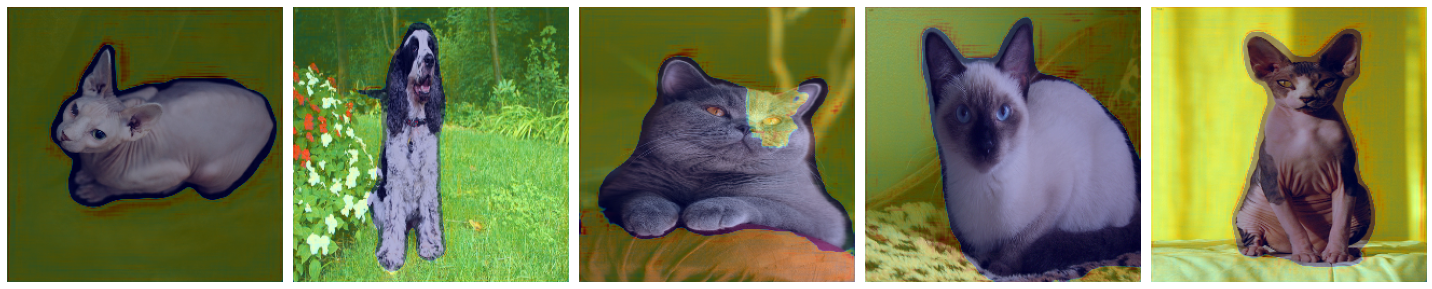

In [18]:
score = SegScore(masks,target_class=1)

cam = gradcam(score, 
              images,
              penultimate_layer='Conv91',
              seek_penultimate_conv_layer=False)

plot_cams(cam,images)

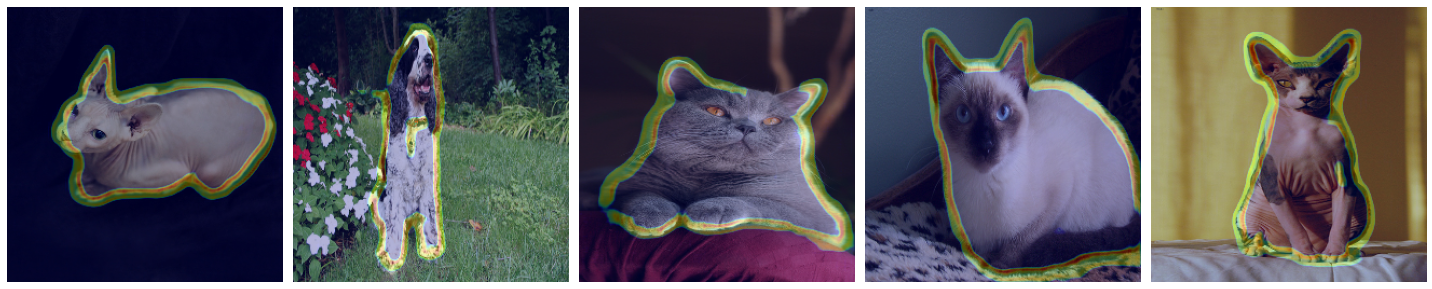

In [19]:
score = SegScore(masks,target_class=2)

cam = gradcam(score, 
              images,
              penultimate_layer='Conv91',
              seek_penultimate_conv_layer=False)

plot_cams(cam,images)